<a href="https://colab.research.google.com/github/kimyeseong984/-yolo-v8/blob/main/yolo_v8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[youtube] Extracting URL: https://www.youtube.com/live/S0-r1dbNQvc?si=X82fyhWoi5q2Ob2s
[youtube] S0-r1dbNQvc: Downloading webpage
[youtube] S0-r1dbNQvc: Downloading tv client config
[youtube] S0-r1dbNQvc: Downloading player 73381ccc-main
[youtube] S0-r1dbNQvc: Downloading tv player API JSON
[youtube] S0-r1dbNQvc: Downloading ios player API JSON
[youtube] S0-r1dbNQvc: Downloading m3u8 information
[info] S0-r1dbNQvc: Downloading 1 format(s): 614+140
[download] /content/video/input_video.mp4 has already been downloaded
✅ 영상 다운로드 완료: /content/video/input_video.mp4

0: 384x640 9 cars, 1 bus, 3 trucks, 1 traffic light, 7.8ms
Speed: 14.3ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 3 trucks, 1 traffic light, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 cars, 2 trucks, 7.7ms
Speed: 4.0ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384

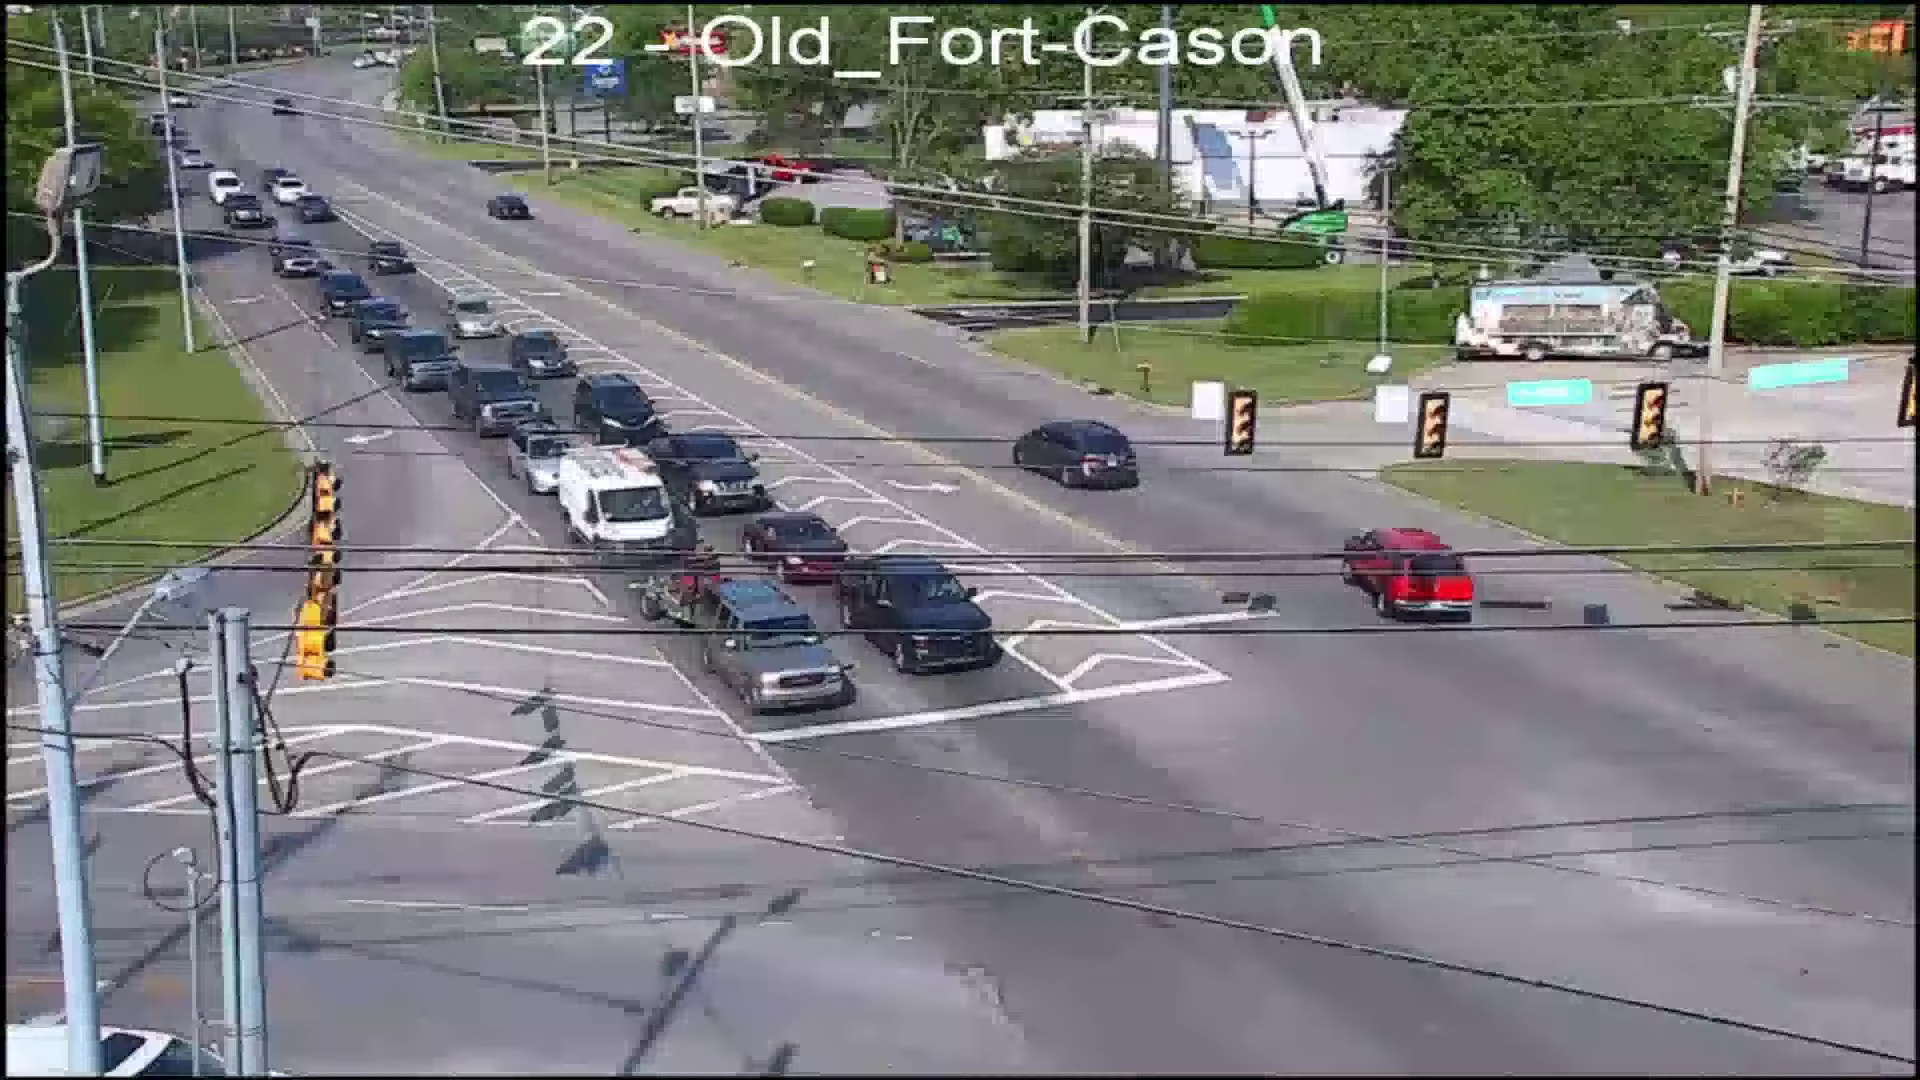

In [14]:
# ✅ 1. 필요한 패키지 설치
!pip install yt-dlp opencv-python-headless ultralytics --quiet
!mkdir -p /content/video

# ✅ 2. 유튜브 영상 다운로드 (일시 중지된 라이브 스트림 아카이브만 가능)
import yt_dlp

video_url = 'https://www.youtube.com/live/S0-r1dbNQvc?si=X82fyhWoi5q2Ob2s'
output_path = '/content/video/input_video.mp4'

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
    'outtmpl': output_path,
    'merge_output_format': 'mp4'
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video_url])

print(f"✅ 영상 다운로드 완료: {output_path}")

# ✅ 3. YOLOv11 (또는 YOLOv8) 모델 로딩
from ultralytics import YOLO

# YOLOv11이 릴리스되었을 경우 아래 경로를 "yolov11.pt"로 바꾸세요
model = YOLO("yolov8n.pt")

# ✅ 4. 차량 탐지 및 카운트
import cv2

cap = cv2.VideoCapture(output_path)
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
vehicle_classes = {'car', 'truck', 'bus', 'motorbike'}

vehicle_count = 0
frame_interval = int(frame_rate)  # 1초당 한 프레임 처리

frame_sample_path = "/content/preview.jpg"
frame_saved = False

for frame_num in range(0, frame_count, frame_interval):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]

    for r in results.boxes.data:
        cls_id = int(r[-1])
        cls_name = model.names[cls_id]
        if cls_name in vehicle_classes:
            vehicle_count += 1

    if not frame_saved:
        cv2.imwrite(frame_sample_path, frame)
        frame_saved = True

cap.release()

print(f"\n🚘 영상 내 차량 총 추정 수: {vehicle_count}")

# ✅ 5. 영상 미리보기 출력
from IPython.display import Image, display
display(Image(filename=frame_sample_path))
